In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('/content/sample_data/Iris_Kmean.csv')
x=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
y=['Species']
X=data[x]
Y=data[y]

In [ ]:
data


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
encoder = LabelEncoder()
data['Species'] = encoder.fit_transform(data['Species'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'],test_size=0.2)

In [ ]:
np.unique(data['Species'])

array([0, 1, 2])

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(120, 4)
(120,)
(30, 4)
(30,)


In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_train = model.fit_predict(x_train)
print(y_kmeans_train)
centroid=model.cluster_centers_
train_labels=model.labels_
print(centroid)
print(train_labels)

[2 0 2 1 2 2 1 2 0 2 0 2 2 1 1 0 1 2 1 0 0 1 0 2 2 2 1 1 2 1 0 1 1 2 1 2 2
 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 1 1 0 0 1 2 0 0 1 0 1 0 1 1 0 1 2 2 1 0 0 1
 2 2 2 0 1 0 1 0 0 1 0 2 0 1 1 1 1 1 0 2 0 1 1 2 0 0 1 1 0 2 1 1 0 2 1 1 0
 1 1 0 2 0 0 2 0 0]
[[5.         3.42142857 1.47857143 0.25      ]
 [5.96521739 2.75434783 4.4326087  1.44347826]
 [6.803125   3.03125    5.696875   2.04375   ]]
[2 0 2 1 2 2 1 2 0 2 0 2 2 1 1 0 1 2 1 0 0 1 0 2 2 2 1 1 2 1 0 1 1 2 1 2 2
 2 0 0 2 1 1 0 0 1 1 2 0 0 0 1 1 1 0 0 1 2 0 0 1 0 1 0 1 1 0 1 2 2 1 0 0 1
 2 2 2 0 1 0 1 0 0 1 0 2 0 1 1 1 1 1 0 2 0 1 1 2 0 0 1 1 0 2 1 1 0 2 1 1 0
 1 1 0 2 0 0 2 0 0]


In [ ]:
print(colormap)

['Red' 'green' 'blue']


Text(0.5, 1.0, 'Classification réel')

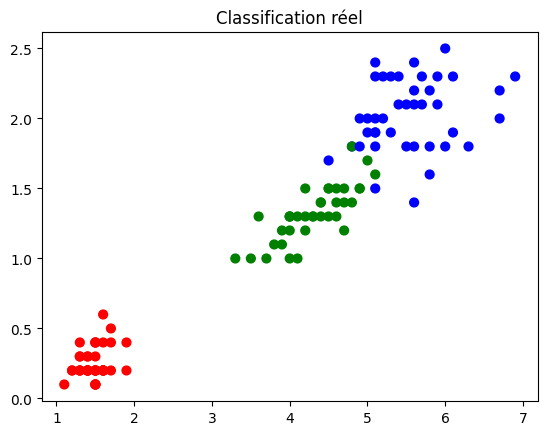

In [ ]:
colormap = np.array(['red', 'green', 'blue'])
plt.scatter(x_train.PetalLengthCm, x_train.PetalWidthCm, c=colormap[y_train], s=40)
plt.title('Classification réel')

Text(0.5, 1.0, 'Classification K-means ')

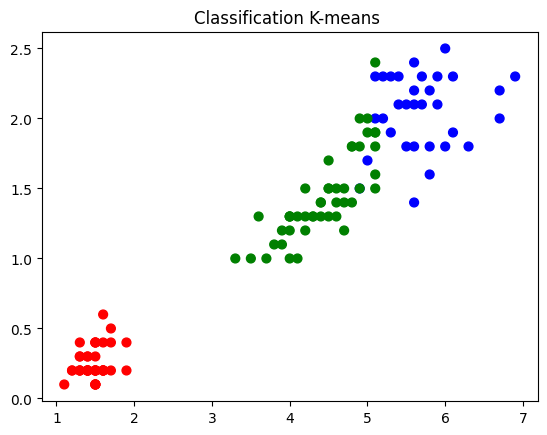

In [ ]:
plt.scatter(x_train.PetalLengthCm, x_train.PetalWidthCm,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')


Text(0.5, 1.0, 'Classification réel')

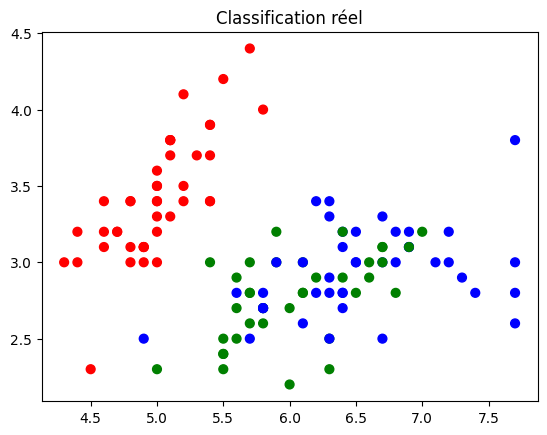

In [ ]:
colormap=np.array(['red','green','blue'])
plt.scatter(x_train.SepalLengthCm, x_train.SepalWidthCm,c=colormap[y_train],s=40)
plt.title('Classification réel')

Text(0.5, 1.0, 'Classification K-means ')

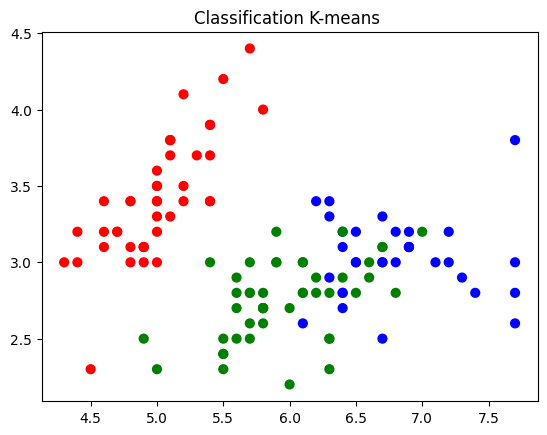

In [ ]:
plt.scatter(x_train.SepalLengthCm, x_train.SepalWidthCm,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')

In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans_test = model.fit_predict(x_test)
print(y_kmeans_test)
centroid=model.cluster_centers_
test_labels=model.labels_
print(centroid)
print(test_labels)

[2 1 0 2 2 0 0 1 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 1 0 2 1 1]
[[5.71875    2.73125    4.28125    1.40625   ]
 [5.0375     3.4        1.3875     0.2125    ]
 [7.1        3.3        5.98333333 2.21666667]]
[2 1 0 2 2 0 0 1 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 1 0 2 1 1]


Text(0.5, 1.0, 'Classification réel')

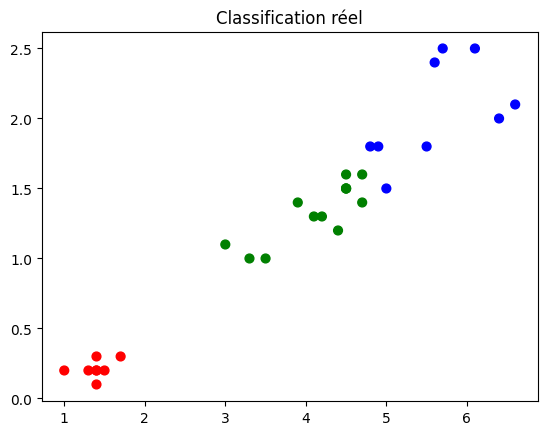

In [ ]:

colormap=np.array(['red','green','blue'])
plt.scatter(x_test.PetalLengthCm, x_test.PetalWidthCm,c=colormap[y_test],s=40)
plt.title('Classification réel')

Text(0.5, 1.0, 'Classification K-means ')

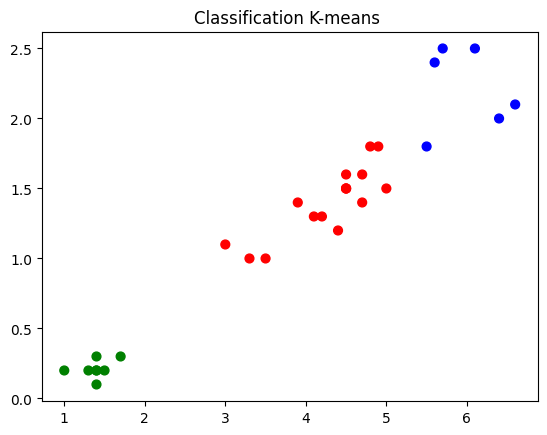

In [ ]:
plt.scatter(x_test.PetalLengthCm, x_test.PetalWidthCm,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')


Text(0.5, 1.0, 'Classification réel')

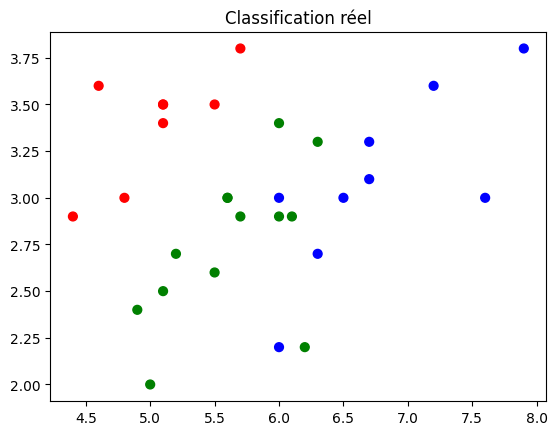

In [ ]:
#Visualisation des clusters
colormap=np.array(['red','green','blue'])
plt.scatter(x_test.SepalLengthCm, x_test.SepalWidthCm,c=colormap[y_test],s=40)
plt.title('Classification réel')

Text(0.5, 1.0, 'Classification K-means ')

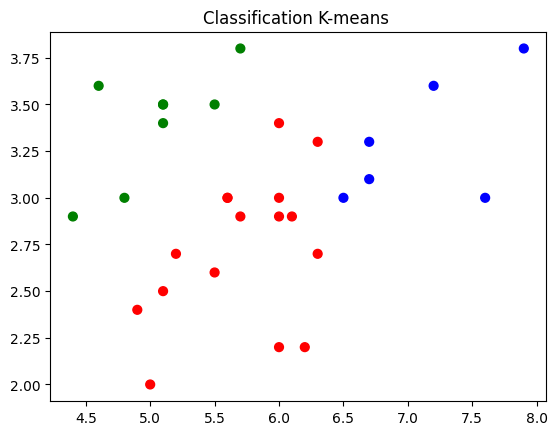

In [ ]:
plt.scatter(x_test.SepalLengthCm, x_test.SepalWidthCm,c=colormap[model.labels_],s=40)
plt.title('Classification K-means ')

In [ ]:
predY = np.choose(model.labels_, [0,1,2])
print (model.labels_)
print (predY)

[2 1 0 2 2 0 0 1 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 1 0 2 1 1]
[2 1 0 2 2 0 0 1 0 1 0 0 0 2 0 0 0 0 2 1 0 0 0 0 1 1 0 2 1 1]


In [ ]:
print(classification_report(model.labels_, predY))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
print(accuracy_score(predY, train_labels)*100)

35.833333333333336


In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
    #print(kmeans.inertia_)

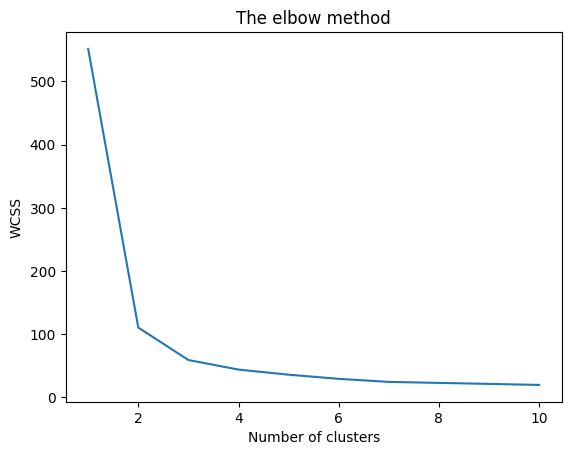

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_test)
    wcss.append(kmeans.inertia_)

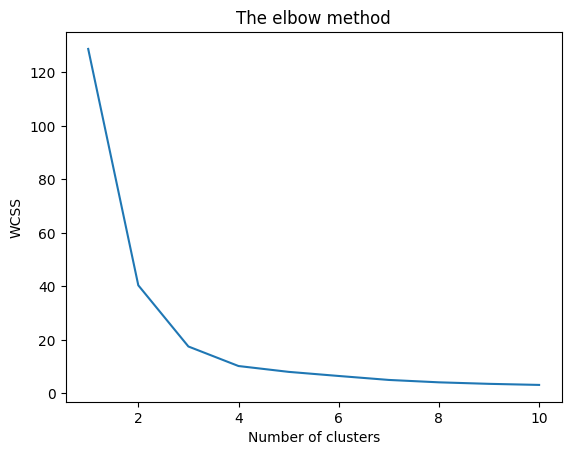

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

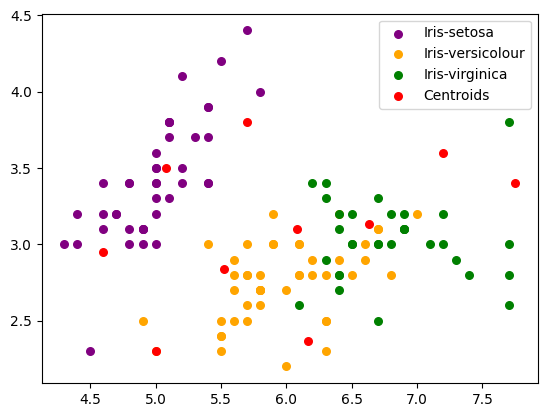

In [ ]:
cols = x_train.columns
plt.scatter(x_train.loc[y_kmeans_train == 0, cols[0]],
           x_train.loc[y_kmeans_train == 0, cols[1]],
            s=30, c='purple',
            label='Iris-setosa')
plt.scatter(x_train.loc[y_kmeans_train == 1, cols[0]],
            x_train.loc[y_kmeans_train == 1, cols[1]],
            s=30, c='orange',
            label='Iris-versicolour')
plt.scatter(x_train.loc[y_kmeans_train == 2, cols[0]],
            x_train.loc[y_kmeans_train == 2, cols[1]],
            s=30, c='green',
            label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=30, c='red',
            label='Centroids')

plt.legend()

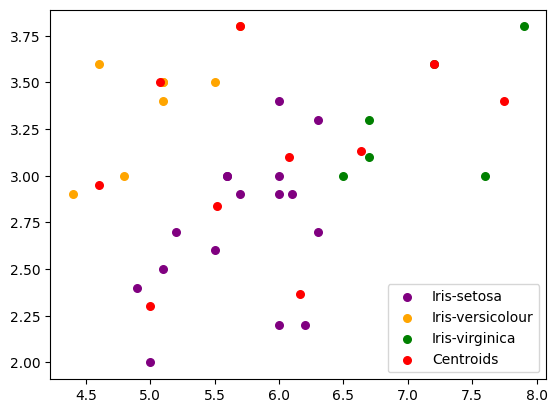

In [ ]:
cols = x_test.columns
plt.scatter(x_test.loc[y_kmeans_test == 0, cols[0]],
           x_test.loc[y_kmeans_test == 0, cols[1]],
            s=30, c='purple',
            label='Iris-setosa')
plt.scatter(x_test.loc[y_kmeans_test == 1, cols[0]],
            x_test.loc[y_kmeans_test == 1, cols[1]],
            s=30, c='orange',
            label='Iris-versicolour')
plt.scatter(x_test.loc[y_kmeans_test == 2, cols[0]],
            x_test.loc[y_kmeans_test == 2, cols[1]],
            s=30, c='green',
            label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=30, c='red',
            label='Centroids')

plt.legend()